In [41]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
torch.cuda.is_available()

True

In [43]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [44]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [45]:
complete_data.query("model_name == 'FullyConvolutionalNetwork1DLate'").query("dataset == 'eigenworms'")

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
131,FullyConvolutionalNetwork1DLate_eigenworms_1,FullyConvolutionalNetwork1DLate,eigenworms,1,1.0,0.826923,2988,9223.304334,3.086782
132,FullyConvolutionalNetwork1DLate_eigenworms_2,FullyConvolutionalNetwork1DLate,eigenworms,2,1.0,0.846154,2524,6388.041970,2.530920
133,FullyConvolutionalNetwork1DLate_eigenworms_3,FullyConvolutionalNetwork1DLate,eigenworms,3,1.0,0.903846,2787,7240.867151,2.598087
134,FullyConvolutionalNetwork1DLate_eigenworms_4,FullyConvolutionalNetwork1DLate,eigenworms,4,1.0,0.923077,2621,4115.663702,1.570265
135,FullyConvolutionalNetwork1DLate_eigenworms_5,FullyConvolutionalNetwork1DLate,eigenworms,5,1.0,0.923077,2565,4027.761118,1.570277
136,FullyConvolutionalNetwork1DLate_eigenworms_6,FullyConvolutionalNetwork1DLate,eigenworms,6,1.0,0.807692,3532,7769.648662,2.199787
137,FullyConvolutionalNetwork1DLate_eigenworms_7,FullyConvolutionalNetwork1DLate,eigenworms,7,1.0,0.846154,2589,5234.824862,2.021949
138,FullyConvolutionalNetwork1DLate_eigenworms_8,FullyConvolutionalNetwork1DLate,eigenworms,8,1.0,0.903846,3733,5859.964262,1.569773
139,FullyConvolutionalNetwork1DLate_eigenworms_9,FullyConvolutionalNetwork1DLate,eigenworms,9,1.0,0.942308,4906,7709.971071,1.571539
140,FullyConvolutionalNetwork1DLate_eigenworms_10,FullyConvolutionalNetwork1DLate,eigenworms,10,1.0,0.884615,2644,5499.709627,2.080072


In [46]:
agg_results_data = get_all_results(True)

In [47]:
agg_results_data

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
0,articularywordrecognition,FullyConvolutionalNetwork1D,0.998043,0.995652,5000.0,72.692681,0.014539
1,articularywordrecognition,FullyConvolutionalNetwork1DGAP,1.000000,1.000000,33.0,2.404418,0.072861
2,articularywordrecognition,FullyConvolutionalNetwork1DLate,0.999565,1.000000,159.7,28.047982,0.189228
3,articularywordrecognition,MultiLayerPerceptron,0.999130,0.981739,2074.4,88.777894,0.045817
4,atrialfibrillation,FullyConvolutionalNetwork1D,1.000000,0.433333,5000.0,15.365478,0.003073
5,atrialfibrillation,FullyConvolutionalNetwork1DLate,1.000000,0.533333,2524.3,43.552386,0.017252
6,atrialfibrillation,MultiLayerPerceptron,1.000000,0.516667,5000.0,7.680521,0.001536
7,basicmotions,FullyConvolutionalNetwork1D,1.000000,1.000000,5000.0,0.058370,0.000012
8,basicmotions,FullyConvolutionalNetwork1DLate,1.000000,1.000000,4.0,0.093952,0.023524
9,basicmotions,MultiLayerPerceptron,0.987500,0.918750,5000.0,11.948030,0.002390


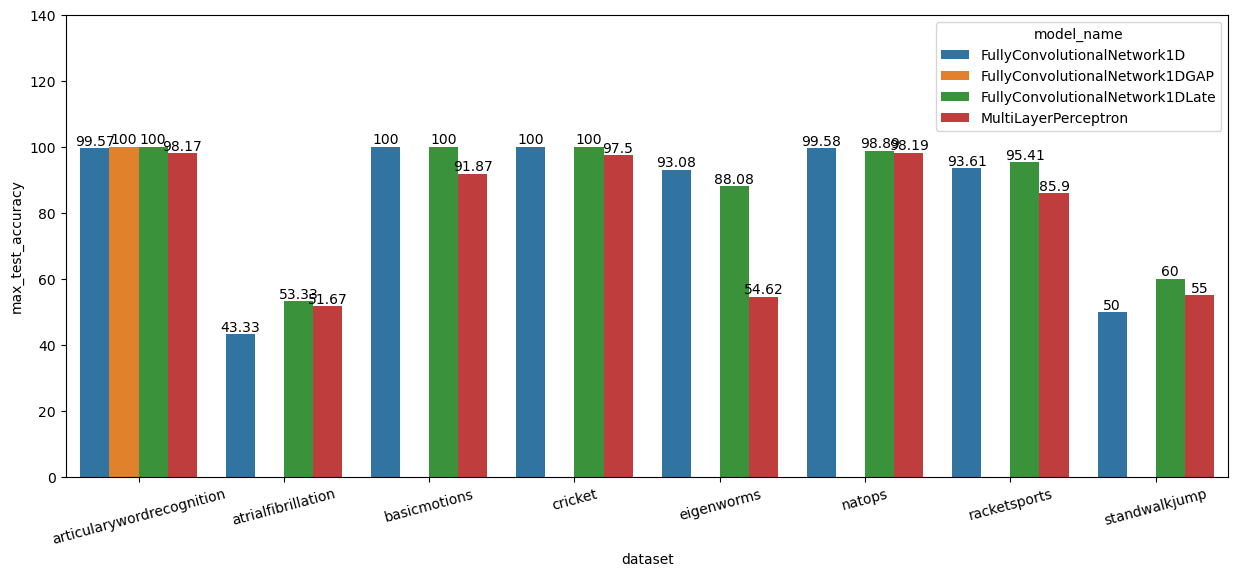

In [49]:
plt.figure(figsize = (15,6))
ax = sns.barplot(
    data = agg_results_data, 
    x = 'dataset', 
    y = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 4)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.ylim([0, 100*1.4])
plt.show()